In [1]:
import pandas as pd
import datetime
import numpy as np
import joblib

In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports.csv')
df_begin

,timestamp,Viavi.Cell.Name,DRB.UEThpDl,DRB.UEThpUl,RRU.PrbUsedDl,RRU.PrbUsedUl,RRU.PrbAvailDl,RRU.PrbAvailUl,RRU.PrbTotUl,RRU.PrbTotDl,RRU.MaxLayerDlMimo,CARR.AverageLayersDl,RRC.ConnMean,RRC.ConnMax,QosFlow.TotPdcpPduVolumeUl,QosFlow.TotPdcpPduVolumeDl,PEE.AvgPower,PEE.Energy
0,1672502400,S1/B2/C1,0.278192,0.278192,81.459016,81.459016,100,100,81.459016,81.459016,0.0,0.0,1.786885,2.311475,277.868853,277.868853,281.947679,0.004195
1,1672502400,S7/B2/C1,0.146310,0.146310,50.000000,50.000000,100,100,50.000000,50.000000,0.0,0.0,0.516667,1.316667,146.050000,146.050000,180.817352,0.002292
2,1672502400,S8/B2/C1,0.220303,0.220303,64.300000,64.300000,100,100,64.300000,64.300000,0.0,0.0,1.450000,3.966667,220.083333,220.083333,230.893458,0.004631
3,1672502400,S9/B2/C1,0.186428,0.186428,80.900000,80.900000,100,100,80.900000,80.900000,0.0,0.0,1.916667,6.900000,186.083333,186.083333,279.584476,0.005326
4,1672502400,S1/B13/C1,0.000000,0.000000,0.000000,0.000000,75,75,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,18.250000,0.000360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524206,1673107140,S3/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,4.000000,0.000000,0.000000,21.000000,11.000064
524207,1673107140,S3/N77/C3,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,2.000000,0.000000,0.000000,21.000000,7.609575
524208,1673107140,S4/N77/C1,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,3.000000,0.000000,0.000000,21.000000,7.789410
524209,1673107140,S4/N77/C2,0.000000,0.000000,0.000000,0.000000,273,273,0.000000,0.000000,0.0,0.0,0.000000,5.000000,0.000000,0.000000,21.000000,18.617635


In [3]:
df_1=df_begin.copy()
convert_time=pd.to_datetime(df_1['timestamp'], unit='s',origin='unix')
df_1.insert(df_1.columns.get_loc('timestamp') + 1, 'datetime_column', convert_time)
df_1.insert(df_1.columns.get_loc('datetime_column') + 1, 'second', df_1['datetime_column'].dt.second)
df_1.insert(df_1.columns.get_loc('datetime_column') + 2, 'minute', df_1['datetime_column'].dt.minute)
df_1.insert(df_1.columns.get_loc('datetime_column') + 3, 'hour', df_1['datetime_column'].dt.hour)
df_1.insert(df_1.columns.get_loc('datetime_column') + 4, 'day', df_1['datetime_column'].dt.day)
print("hour:", df_1['hour'].unique())
print("day:", df_1['day'].unique())

hour: [16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
day: [31  1  2  3  4  5  6  7]


In [4]:
df_2= df_1[['datetime_column','minute','hour','day','Viavi.Cell.Name','DRB.UEThpDl','DRB.UEThpUl','RRU.PrbTotUl','RRU.PrbTotDl',
                                                'QosFlow.TotPdcpPduVolumeUl','QosFlow.TotPdcpPduVolumeDl','PEE.AvgPower','PEE.Energy','RRC.ConnMean']].copy()
validation_data             = df_2[df_2['Viavi.Cell.Name'].isin(['S1/B2/C1'])].copy()
validation_data             = validation_data.set_index('datetime_column', drop=True)
x_validation=validation_data.drop(columns=['minute','hour','day','Viavi.Cell.Name','RRC.ConnMean']).astype(float).copy()
y_validation=validation_data['RRC.ConnMean'].to_numpy()
print(x_validation.shape, y_validation.shape)

(10080, 8) (10080,)


In [5]:
from sklearn.preprocessing import  StandardScaler
def scaler_data(data):
    scaler = StandardScaler()
    data_scaled= scaler.fit_transform(data)
    return data_scaled, scaler

In [6]:
x_validation_scaled,x_scaler= scaler_data(x_validation)
y_validation_scaled, y_scaler= scaler_data(y_validation.reshape(-1,1))

In [7]:
#x_scaler = joblib.load('x_scaler_1.bin')
#x_validation_scaled= x_scaler.transform(x_validation)
#y_scaler = joblib.load('y_scaler_1.bin')
#y_validation_scaled= y_scaler.transform(y_validation.reshape(-1,1))

In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM
def model_tensorflow(time_step, jumlah_fitur, x_test, pilih_models):
    model = Sequential()
    model.add(LSTM(units=100, input_shape=(time_step, jumlah_fitur), return_sequences=True))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='linear'))

    model.load_weights(filepath=pilih_models)
    return model.predict(x_test)

In [9]:
def split_input_to_timestep(data, timestep):
    x_dictionary = {}
    for i in range(0,data.shape[1]):
        x_dictionary['x%d'%i] = [data[_:_+timestep, i] for _ in range(data.shape[0] - timestep)]
    x_final =np.stack(list(x_dictionary.values()), axis=2)
    return x_final


In [10]:
x_validation_scaled_final= split_input_to_timestep(x_validation_scaled, timestep=60)
y_validation_scaled_final=y_validation_scaled[60:]
print(x_validation_scaled_final.shape, y_validation_scaled_final.shape)

(10020, 60, 8) (10020, 1)


In [11]:
coba=model_tensorflow(time_step=60, jumlah_fitur=8, x_test=x_validation_scaled_final, pilih_models='MAE_lowest_single_60_3.h5')

In [12]:
predictions =   y_scaler.inverse_transform(coba)
actual      =   y_scaler.inverse_transform(y_validation_scaled_final)

In [13]:
predictions.shape

(10020, 1)

In [14]:
actual.shape

(10020, 1)

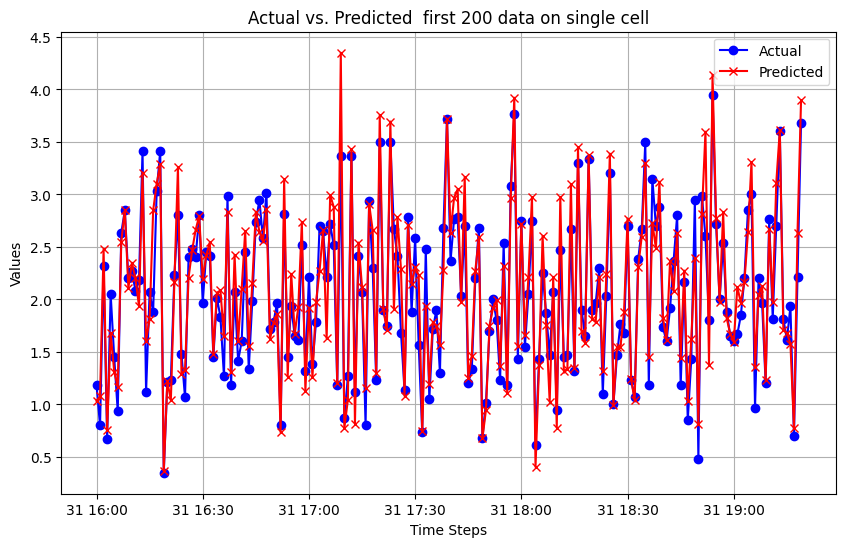

In [15]:
import numpy as np
import matplotlib.pyplot as plt


time_steps = validation_data.index[:200]
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(time_steps, actual[:200], label='Actual', marker='o', color='blue')
plt.plot(time_steps, predictions[:200], label='Predicted', marker='x', color='red')

plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Actual vs. Predicted  first 200 data on single cell')
plt.legend()

plt.grid(True)
plt.show()


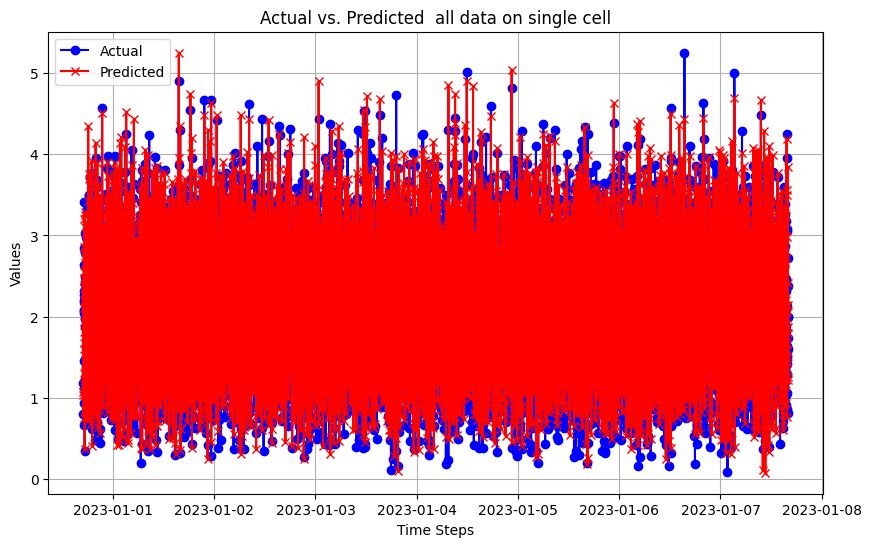

In [16]:
time_steps = validation_data.index[60:]
# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(time_steps, actual, label='Actual', marker='o', color='blue')
plt.plot(time_steps, predictions, label='Predicted', marker='x', color='red')

plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Actual vs. Predicted  all data on single cell')
plt.legend()

plt.grid(True)
plt.show()